In [1]:
!python3 --version

Python 3.7.12


In [ ]:
!nvidia-smi

Sun Nov 28 13:52:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Project Directory
PROJECT_DIR = "/content/drive/MyDrive/Mini_Project_II"

In [4]:
import sys
import os

sys.path.append(os.path.join(PROJECT_DIR,'notebooks'))

In [5]:
from helpers import preprocess

In [6]:
train_datagen = preprocess.get_train_datagen(only_one_video=False,small_sample=True)

Removing Missing Data from csv
tt0493405.00 not found. Removing entry from data
tt0493405.01 not found. Removing entry from data
tt0493405.02 not found. Removing entry from data
kCppUtS9vLk.00 not found. Removing entry from data
kCppUtS9vLk.01 not found. Removing entry from data
EbcfiIeH63M.00 not found. Removing entry from data
EbcfiIeH63M.01 not found. Removing entry from data
EbcfiIeH63M.02 not found. Removing entry from data
pxxPznV38Hk.00 not found. Removing entry from data
pxxPznV38Hk.01 not found. Removing entry from data
pxxPznV38Hk.02 not found. Removing entry from data
1yhNm_8q07g.00 not found. Removing entry from data
1yhNm_8q07g.01 not found. Removing entry from data
1yhNm_8q07g.02 not found. Removing entry from data
Final dataset shape:  (984, 7)
Taking only 100 samples (50 true + 50 false)
Final Dataframe shape :  (592, 7)


In [7]:
import matplotlib.pyplot as plt

In [8]:
valid_datagen = preprocess.get_validation_datagen(only_one_video=False)

Removing Missing Data from csv
Final dataset shape:  (18, 7)


In [9]:
X,y = train_datagen.__getitem__(14)
X.shape ,y.shape

((1, 60, 224, 224, 3), (1, 1))

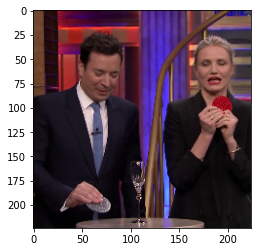

In [10]:
plt.imshow(X[0][59])

In [11]:
from keras.applications.vgg16 import VGG16,decode_predictions
from keras.layers import Dropout,Flatten,Dense

In [12]:
from keras.layers import Input
from keras.models import Sequential,Model

def build_feature_extractor():
    feature_extractor = VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg'
    )

    inputs = Input(shape=(224,224,3))
    feature_ops = feature_extractor(inputs)
    return Model(inputs,feature_ops, name='feature_ext')

In [13]:
feature_extractor = build_feature_extractor()

58900480/58889256 [==============================] - 0s 0us/step


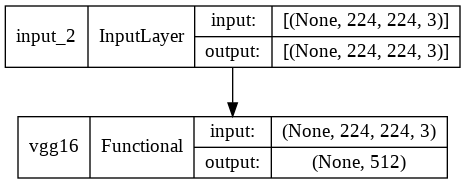

In [14]:
from keras.utils.all_utils import plot_model

plot_model(feature_extractor,show_shapes=True)

In [ ]:
from keras.layers import TimeDistributed, LSTM

model = Sequential()

model.add(Input(shape=(60,224,224,3)))
model.add(TimeDistributed(feature_extractor))
model.add(LSTM(64))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 60, 512)          14714688  
 ibuted)                                                         
                                                                 
 lstm (LSTM)                 (None, 64)                147712    
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

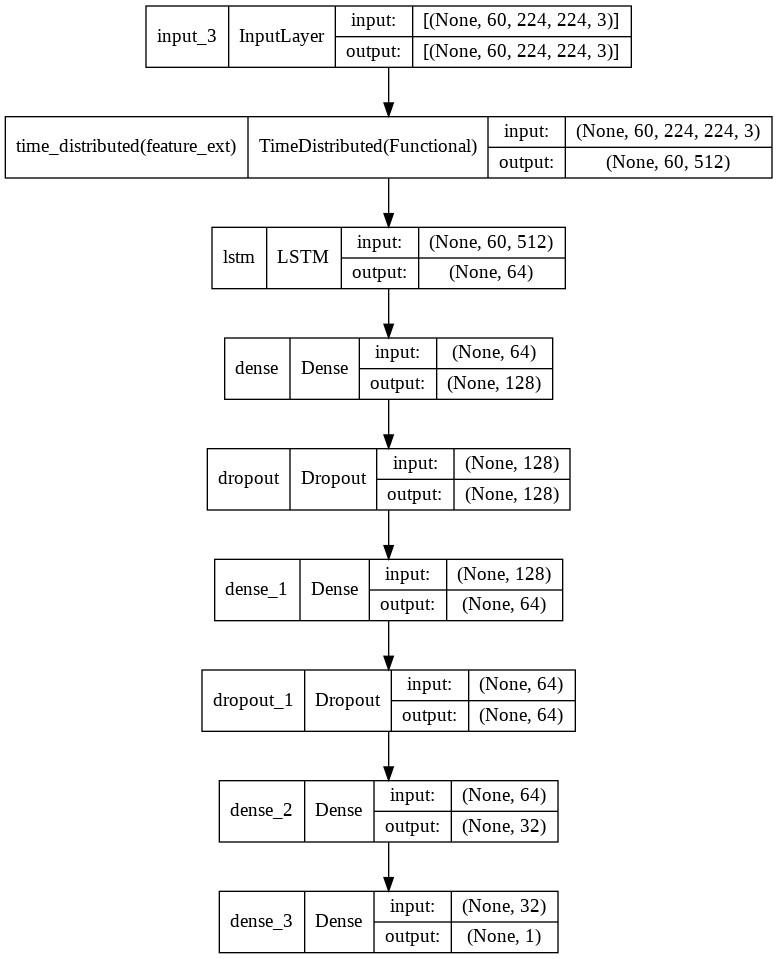

In [ ]:
from keras.utils.all_utils import plot_model

plot_model(model,show_shapes=True)

In [ ]:
history = model.fit(train_datagen,epochs=10,use_multiprocessing=True,validation_data=valid_datagen)

Epoch 1/10
592/592 [==============================] - 4220s 7s/step - loss: 0.7064 - accuracy: 0.5304 - val_loss: 0.7452 - val_accuracy: 0.5000
Epoch 2/10
592/592 [==============================] - 3820s 6s/step - loss: 0.7041 - accuracy: 0.4696 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/10
592/592 [==============================] - 3749s 6s/step - loss: 0.7010 - accuracy: 0.4595 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
592/592 [==============================] - 3969s 7s/step - loss: 0.6942 - accuracy: 0.4882 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 5/10
592/592 [==============================] - 3789s 6s/step - loss: 0.6969 - accuracy: 0.4831 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
539/592 [==========================>...] - ETA: 5:27 - loss: 0.6947 - accuracy: 0.4991